In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df15 = pd.read_csv('data/SBAC15_micro_246169_20200130_CSV.csv', delimiter=';', decimal=',')
df15.head()

/var/folders/hx/fcx4yqw903n270zvkg9tjlqc0000gn/T/ipykernel_7237/2612039408.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df15 = pd.read_csv('data/SBAC15_micro_246169_20200130_CSV.csv', delimiter=';', decimal=',')


,codigo,ciclo,amie,nm_regi,es_regeva,id_zona,id_dist,id_circ,id_prov,id_cant,...,imat,ilyl,icn,ies,nl_inev,nl_imat,nl_ilyl,nl_icn,nl_ies,deshonestidad
0,9RKJ277806,2014-2015,01B00020,2,2,6,01D02,01D02C12,1,101,...,5.50,6.00,5.88,6.00,0,0,0,0,0,2
1,9RS7281213,2014-2015,01B00020,2,2,6,01D02,01D02C12,1,101,...,7.75,6.00,5.50,5.50,0,1,0,0,0,2
2,6CFB281475,2014-2015,01B00020,2,2,6,01D02,01D02C12,1,101,...,6.00,6.25,6.25,8.00,0,0,0,0,2,2
3,FP5L287405,2014-2015,01B00020,2,2,6,01D02,01D02C12,1,101,...,6.50,7.00,6.25,7.67,0,0,1,0,1,2
4,JZG8287407,2014-2015,01B00020,2,2,6,01D02,01D02C12,1,101,...,7.00,5.75,7.00,8.30,1,1,0,1,2,2


In [7]:
df15.shape

(246169, 34)

In [8]:
cantones = pd.read_excel('data/SBAC19_diccionariomicro_20200325_DIC.xlsx', sheet_name="Cantón")
cantones.head()

,Código de Cantón,Nombre de la Cantón
0,101,Cuenca
1,102,Girón
2,103,Gualaceo
3,104,Nabón
4,105,Paute


In [9]:
dfCanton = df15.merge(cantones, left_on='id_cant', right_on='Código de Cantón')
dfCanton.drop(columns='id_cant')
dfCanton.head()

,codigo,ciclo,amie,nm_regi,es_regeva,id_zona,id_dist,id_circ,id_prov,id_cant,...,icn,ies,nl_inev,nl_imat,nl_ilyl,nl_icn,nl_ies,deshonestidad,Código de Cantón,Nombre de la Cantón
0,9RKJ277806,2014-2015,01B00020,2,2,6,01D02,01D02C12,1,101,...,5.88,6.00,0,0,0,0,0,2,101,Cuenca
1,9RS7281213,2014-2015,01B00020,2,2,6,01D02,01D02C12,1,101,...,5.50,5.50,0,1,0,0,0,2,101,Cuenca
2,6CFB281475,2014-2015,01B00020,2,2,6,01D02,01D02C12,1,101,...,6.25,8.00,0,0,0,0,2,2,101,Cuenca
3,FP5L287405,2014-2015,01B00020,2,2,6,01D02,01D02C12,1,101,...,6.25,7.67,0,0,1,0,1,2,101,Cuenca
4,JZG8287407,2014-2015,01B00020,2,2,6,01D02,01D02C12,1,101,...,7.00,8.30,1,1,0,1,2,2,101,Cuenca


In [10]:
dfCanton['nl_inev'].unique()

array([     0,      1, 999999,      2,      3])

In [11]:
dfCanton.loc[dfCanton['nl_inev'] == 999999]

,codigo,ciclo,amie,nm_regi,es_regeva,id_zona,id_dist,id_circ,id_prov,id_cant,...,icn,ies,nl_inev,nl_imat,nl_ilyl,nl_icn,nl_ies,deshonestidad,Código de Cantón,Nombre de la Cantón
15,3N8Z382511,2014-2015,01B00020,2,2,6,01D02,01D02C12,1,101,...,999999.0,999999.0,999999,999999,999999,999999,999999,2,101,Cuenca
42,HBA8327423,2014-2015,01B00022,2,2,6,01D01,01D01C03,1,101,...,999999.0,999999.0,999999,999999,999999,999999,999999,2,101,Cuenca
67,IA40473662,2014-2015,01B00022,2,2,6,01D01,01D01C03,1,101,...,999999.0,999999.0,999999,999999,999999,999999,999999,2,101,Cuenca
73,LVG8329046,2014-2015,01H00002,2,2,6,01D01,01D01C03,1,101,...,999999.0,999999.0,999999,999999,999999,999999,999999,2,101,Cuenca
209,MYCH433074,2014-2015,01H00032,2,2,6,01D01,01D01C03,1,101,...,999999.0,999999.0,999999,999999,999999,999999,999999,2,101,Cuenca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246132,2AHP494300,2014-2015,24H00362,1,1,5,24D02,24D02C01,24,2402,...,999999.0,999999.0,999999,999999,999999,999999,999999,2,2402,La Libertad
246134,AP8K495814,2014-2015,24H00362,1,1,5,24D02,24D02C01,24,2402,...,999999.0,999999.0,999999,999999,999999,999999,999999,2,2402,La Libertad
246138,6DDI499041,2014-2015,24H00362,1,1,5,24D02,24D02C01,24,2402,...,999999.0,999999.0,999999,999999,999999,999999,999999,2,2402,La Libertad
246140,IGI1499524,2014-2015,24H00362,1,1,5,24D02,24D02C01,24,2402,...,999999.0,999999.0,999999,999999,999999,999999,999999,2,2402,La Libertad


In [12]:
dfCanton = dfCanton.loc[dfCanton['nl_inev'] != 999999]
dfCanton["Nombre de la Cantón"].value_counts().head()

Nombre de la Cantón
Quito            39621
Guayaquil        36339
Cuenca           10176
Ambato            6463
Santo Domingo     6294
Name: count, dtype: int64

In [13]:
dfCantonesGrandes = dfCanton.loc[dfCanton['Nombre de la Cantón'].isin(['Quito', 'Guayaquil', 'Cuenca'])]
dfCantonesGrandes.shape

(86136, 36)

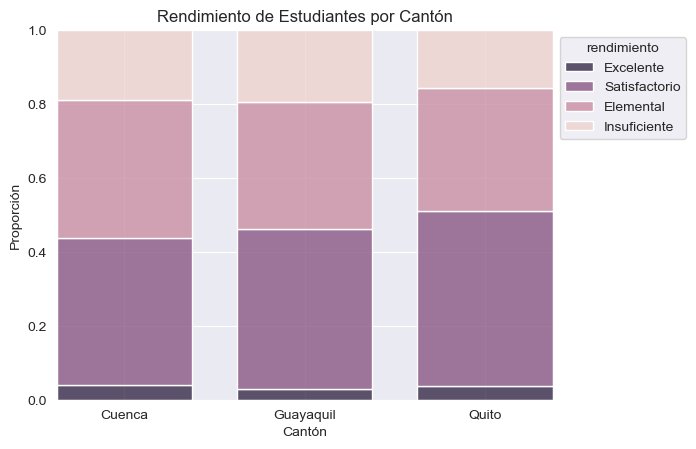

In [14]:
sns.histplot(
    data=dfCantonesGrandes,
    x="Nombre de la Cantón", hue="nl_inev",
    multiple="fill", stat="proportion",
    shrink=0.75
).set(title='Rendimiento de Estudiantes por Cantón', xlabel='Cantón', ylabel='Proporción')
plt.legend(title="rendimiento", labels=["Excelente", "Satisfactorio", "Elemental","Insuficiente"], loc = 2, bbox_to_anchor = (1,1))
plt.show()

In [15]:
dfCanton["id_zona"].value_counts()

id_zona
9     39645
8     39095
5     33520
4     28515
3     25130
1     20619
7     20066
6     19188
2     10829
90      404
Name: count, dtype: int64

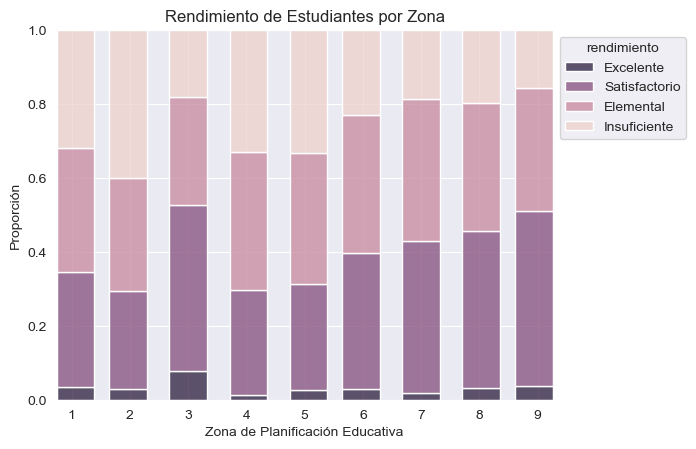

In [16]:
sns.histplot(
    data=dfCanton.loc[dfCanton["id_zona"] != 90],
    x="id_zona", hue="nl_inev",
    multiple="fill", stat="proportion",
    shrink=5
).set(title='Rendimiento de Estudiantes por Zona', xlabel='Zona de Planificación Educativa', ylabel='Proporción')
plt.legend(title="rendimiento", labels=["Excelente", "Satisfactorio", "Elemental","Insuficiente"], loc = 2, bbox_to_anchor = (1,1))
plt.show()

In [17]:
dfCanton['financiamiento'] = pd.Categorical(dfCanton['financiamiento']).rename_categories({1: 'Público', 2: 'Privado', 3: 'Mixto'})

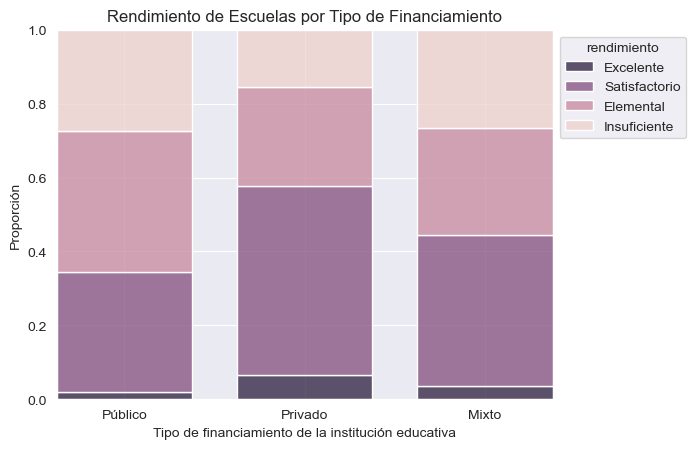

In [18]:
sns.histplot(
    data=dfCanton,
    x="financiamiento", hue="nl_inev",
    multiple="fill", stat="proportion",
    shrink=0.75
).set(title='Rendimiento de Escuelas por Tipo de Financiamiento', xlabel='Tipo de financiamiento de la institución educativa', ylabel='Proporción')
plt.legend(title="rendimiento", labels=["Excelente", "Satisfactorio", "Elemental","Insuficiente"], loc = 2, bbox_to_anchor = (1,1))
plt.show()

/Users/lurapozo/anaconda3/envs/ds/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


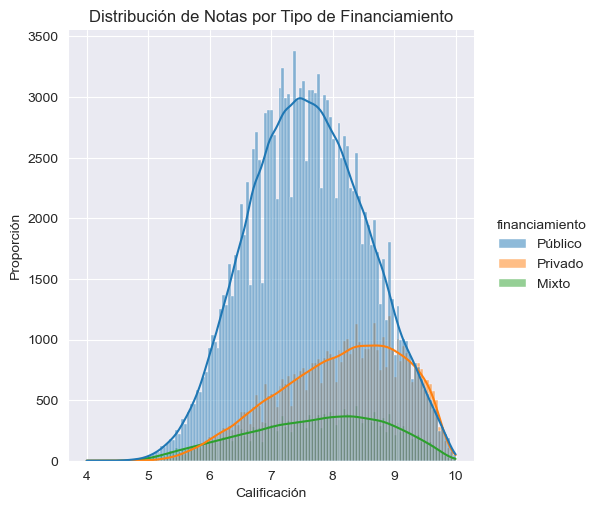

In [19]:
sns.displot(
    data=dfCanton, 
    x="inev", 
    hue="financiamiento",
    kde=True
).set(title='Distribución de Notas por Tipo de Financiamiento', xlabel='Calificación', ylabel='Proporción')
plt.show()

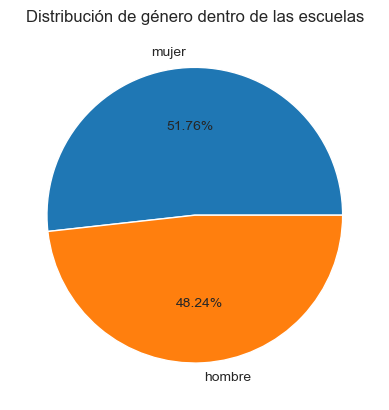

In [20]:
plt.pie(dfCanton['tp_sexo'].value_counts(normalize=True), labels=["mujer", "hombre"], autopct='%.2f%%')
plt.title("Distribución de género dentro de las escuelas")
plt.show()

In [21]:
dfCanton['inev'].describe()

count    237011.00000
mean          7.73347
std           1.00094
min           4.00000
25%           7.00000
50%           7.74000
75%           8.49000
max          10.00000
Name: inev, dtype: float64

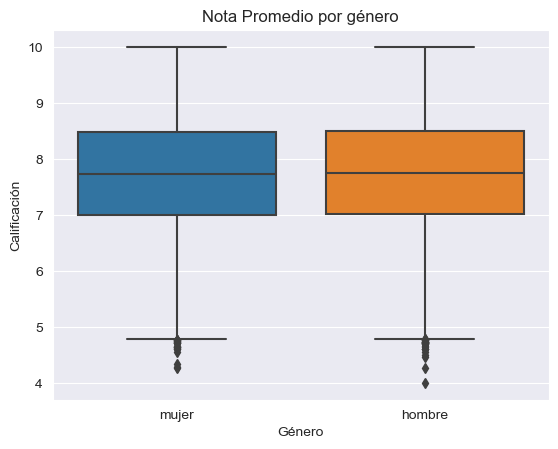

In [22]:
sns.boxplot(
    dfCanton, 
    x="tp_sexo", 
    y="inev",
).set(title='Nota Promedio por género', xlabel='Género', ylabel='Calificación', xticklabels = (["mujer", "hombre"]))

plt.show()